# Exploratory analysis of gene expression data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.cluster as cluster
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from result_analysis import run_pca, plot_pca, run_tsne, plot_tsne
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [4]:
DATAFOLDER_ALL = 'C:/Users/BiSBII/Documents/plantdb/omics_data/RNAseq/all_data'

In [5]:
rnaseq_all = 'RNASeq_all.csv'
metadata_file_all = 'RNAseq_metadata_all.xlsx'

In [6]:
data_all = pd.read_csv(os.path.join(DATAFOLDER_ALL, rnaseq_all), index_col=0)

In [7]:
metadata_all = pd.read_excel(os.path.join(DATAFOLDER_ALL, metadata_file_all), index_col=0)

In [8]:
data_all.shape

(35336, 217)

berry    168
leaf      28
stem      21
Name: tissue, dtype: int64


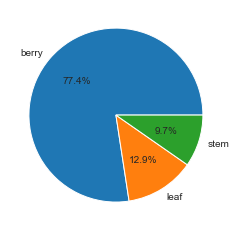

In [19]:
values = metadata_all['tissue'].value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
plt.savefig('pie_tissues.png')
plt.show()

GSE98923     120
GSE97900      42
GSE97960      36
GSE76256      12
GSE74428       4
GSE89113       3
Name: study, dtype: int64


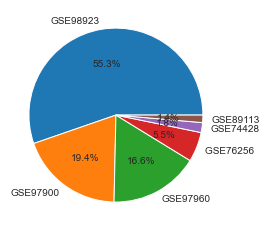

In [20]:
values = metadata_all['study'].value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
plt.savefig('pie_studies.png')
plt.show()

Illumina HiSeq 1000    120
Illumina HiSeq 2500     54
Illumina HiSeq 2000     43
Name: platform, dtype: int64


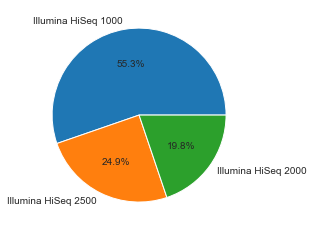

In [21]:
values = metadata_all['platform'].value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
plt.savefig('pie_platform.png')
plt.show()

In [9]:
data_all_log2 = pd.DataFrame(np.log2(data_all.values + 1.1), index=data_all.index, columns=data_all.columns)

In [10]:
data_all_t = data_all_log2.transpose()

In [19]:
# remove some features
vt = VarianceThreshold(0.1)
data_filtered = vt.fit_transform(data_all_t)
cols_inds = vt.get_support(indices=True)
df_data_filtered = pd.DataFrame(data_filtered, index=data_all_t.index, columns=data_all_t.columns[cols_inds])
df_data_filtered.shape

(217, 22413)

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data_filtered)
df_data_scaled = pd.DataFrame(data_scaled, columns=df_data_filtered.columns,
                              index=df_data_filtered.index)
df_data_scaled.shape

(217, 22413)

In [25]:
df_pca, explained_variance, _, _ = run_pca(n_components=6, data=df_data_scaled)
explained_variance

array([0.29833459, 0.1583559 , 0.12767825, 0.07592661, 0.04701121,
       0.02828021])

In [49]:
df_tsne = run_tsne(n_components=2, data=df_pca)
df_tsne

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,tsne 1,tsne 2
SRR2845691,16.968868,-1.923923
SRR2845693,16.788906,-1.922935
SRR2845694,16.784113,-1.923411
SRR2845695,17.056858,-1.915079
SRR3046427,6.937945,-3.377852
...,...,...
SRR5560622,-15.052490,5.360336
SRR5560623,-13.844574,5.945850
SRR5560624,-15.367805,5.687556
SRR5560625,-14.944312,6.058471


In [50]:
df_tsne['factor'] = metadata_all['tissue']

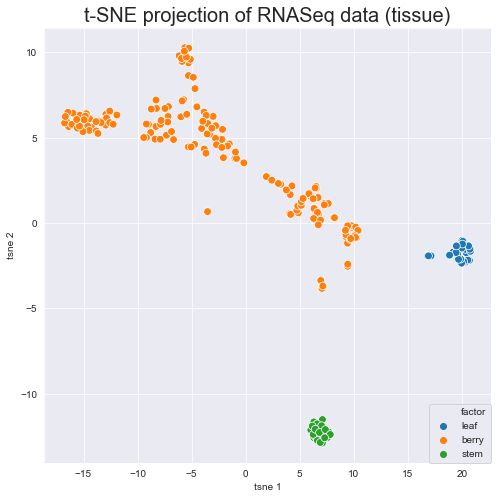

In [51]:
plot_tsne(data=df_tsne, name_fig='tsne_rnaseq_tissue_pca', title='t-SNE projection of RNASeq data (tissue)')

# CHOSEN DATA

In [3]:
DATAFOLDER = 'C:/Users/BiSBII/Documents/plantdb/omics_data/RNAseq/UPDATE'
rnaseq_file = 'GREAT_TPM_MODEL_GENES.csv'
metadata_file = 'RNAseq_metadata.xlsx'

In [4]:
data = pd.read_csv(os.path.join(DATAFOLDER, rnaseq_file), index_col=0)

In [5]:
metadata = pd.read_excel(os.path.join(DATAFOLDER, metadata_file), index_col=0)

In [6]:
data.shape

(6018, 162)

In [56]:
data.isna().any(axis=1).sum()

0

In [36]:
data = data.fillna(value=0)

In [53]:
data.describe()

,GSM2579822,GSM2579823,GSM2579824,GSM2579825,GSM2579826,GSM2579827,GSM2579828,GSM2579829,GSM2579830,GSM2579831,...,GSM2627813,GSM2627814,GSM2627815,GSM2627816,GSM2627817,GSM2627818,GSM2627819,GSM2627820,GSM2627821,GSM2627822
count,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,...,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000
mean,34.376074,34.376074,34.376074,34.376074,34.376074,34.376074,34.376074,34.376074,34.376074,34.376074,...,34.376074,34.376074,34.376074,34.376074,34.376074,34.376074,34.376074,34.376074,34.376074,34.376074
std,194.455613,250.013268,246.394369,352.543199,399.150326,263.789086,255.227745,299.705338,266.365025,188.047988,...,610.440541,453.836661,479.525767,510.110589,433.429569,470.029452,613.137551,503.657880,519.283613,439.386660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.334357,0.275701,0.245230,0.170718,0.147344,0.295755,0.237255,0.198323,0.274586,0.383530,...,0.035170,0.083093,0.069716,0.094387,0.062950,0.054958,0.046953,0.068722,0.056139,0.049912
50%,6.273300,5.356748,5.460041,4.048275,3.745415,5.514881,5.285470,4.562359,5.131783,6.014464,...,2.178182,2.899569,2.807272,2.956810,2.638504,2.511775,2.445996,2.719679,2.508538,2.649210
75%,26.993966,25.172423,25.791389,21.026702,20.101857,25.215908,24.867489,22.995440,24.162609,25.906814,...,16.741778,19.518168,19.300583,19.032501,19.955431,19.549584,18.065047,19.667110,18.847584,19.996321
max,22553.203125,34818.242188,33138.542969,52679.582031,56431.394531,37297.531250,35058.128906,42154.199219,35672.343750,18745.871094,...,69104.367188,51916.828125,55205.078125,54909.632812,46870.265625,49089.847656,64784.539062,54836.113281,54076.867188,46777.320312


In [37]:
metadata['tissue'].unique()

array(['stem', 'leaf', 'berry_green', 'berry_mature'], dtype=object)

In [25]:
metadata['study'].unique()

array(['GSE97900', 'GSE98923'], dtype=object)

berry_mature    75
berry_green     45
stem            21
leaf            21
Name: tissue, dtype: int64


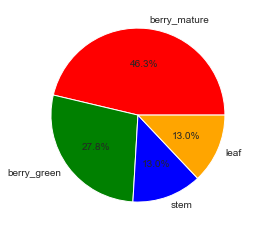

In [11]:
values = metadata['tissue'].value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%', colors=['red', 'green', 'blue', 'orange'])
plt.savefig('pie_sample_distribution.png')
plt.show()

GSE98923    120
GSE97900     42
Name: study, dtype: int64


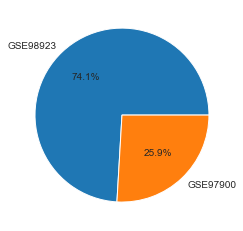

In [81]:
studies = metadata['study'].value_counts()
print(studies)

plt.pie(studies , labels = studies.index, autopct='%1.1f%%')
plt.show()

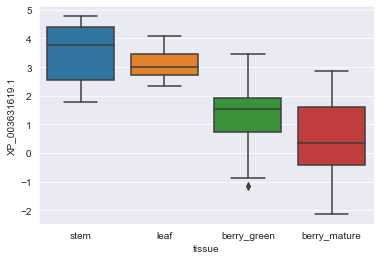

In [15]:
example = data.iloc[1, :]
sb.boxplot(x = metadata['tissue'], y = example)

In [7]:
data_t = data.transpose()
data_t = data_t.astype(float)

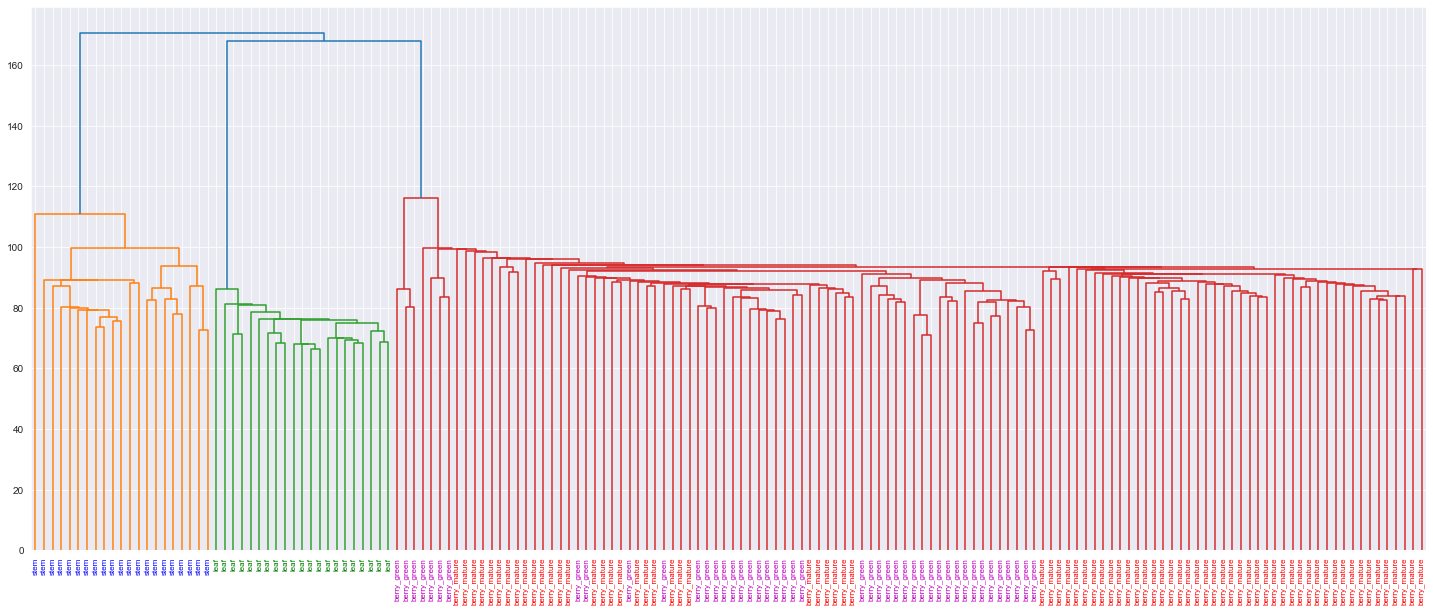

In [18]:
z = cluster.hierarchy.linkage(df_data_scaled)

plt.figure(figsize=(25,10))
cluster.hierarchy.dendrogram(z, labels=metadata['tissue'], leaf_rotation=90., leaf_font_size=8)

label_colors = {'berry_green': 'm', 'leaf': 'g', 'stem':'b', 'berry_mature': 'r'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

In [8]:
data_log2 = pd.DataFrame(np.log2(data_t.values + 1.1), index=data_t.index, columns=data_t.columns)
data_log2.shape

(162, 6018)

In [10]:
vt = VarianceThreshold(0.1)
data_filtered = vt.fit_transform(data_log2)
cols_inds = vt.get_support(indices=True)
df_data_filtered = pd.DataFrame(data_filtered, index=data_log2.index, columns=data_log2.columns[cols_inds])
df_data_filtered.shape

(162, 4190)

In [10]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data_filtered)
df_data_scaled = pd.DataFrame(data_scaled, columns=df_data_filtered.columns,
                              index=df_data_filtered.index)
df_data_scaled.shape

(162, 4190)

In [12]:
df_pca, explained_variance, df_names, loadings = run_pca(n_components=2, data=df_data_filtered)
explained_variance

array([0.48019173, 0.17647185])

In [13]:
df_pca['factor'] = metadata['tissue']

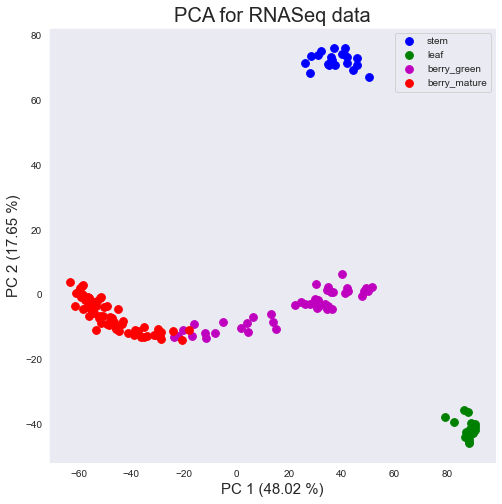

In [14]:
plot_pca(data=df_pca, explained_variance=explained_variance, c1='PC 1', c2='PC 2',
         title='PCA for RNASeq data', name_fig='pca_rnaseq_tpm_log2_great')

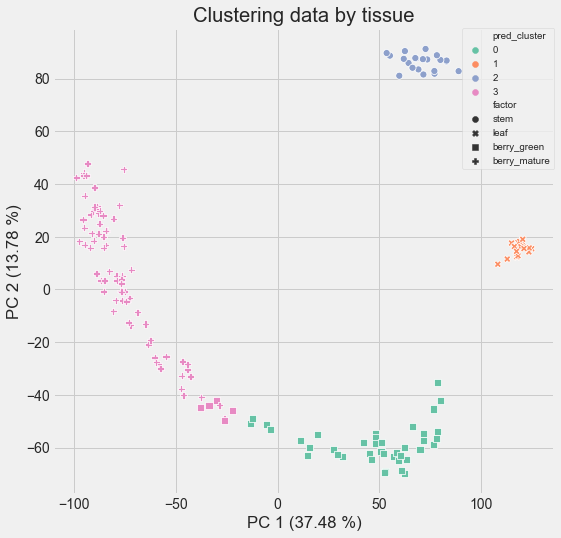

In [26]:
cluster = KMeans(n_clusters=4)
cluster.fit(df_data_scaled)
predicted_labels = cluster.labels_

df_pca['pred_cluster'] = predicted_labels

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sb.scatterplot(
    "PC 1",
    "PC 2",
    s=50,
    data=df_pca,
    hue="pred_cluster",
    style="factor",
    palette="Set2",
)
c1 = 'PC 1'
c2 = 'PC 2'

x_label = f'{c1} ({round(explained_variance[0] * 100, 2)} %)'
y_label = f'{c2} ({round(explained_variance[1] * 100, 2)} %)'
scat.set_xlabel(x_label)
scat.set_ylabel(y_label)
scat.set_title("Clustering data by tissue")
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.0,
           fontsize='x-small')
fig_path = os.path.join(DATAFOLDER, 'PCA_clustering.png')
plt.savefig(fig_path)

plt.show()

### tsne

In [67]:
df_tsne = run_tsne(n_components=2, data=df_pca)
df_tsne

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,tsne 1,tsne 2
SRR5453852,-1.500760,-11.192275
SRR5453853,-1.268852,-11.144760
SRR5453854,-1.044279,-11.167859
SRR5453855,-0.719525,-11.163670
SRR5453856,-0.695379,-11.153461
...,...,...
SRR5560622,8.713981,8.478934
SRR5560623,7.913480,8.093406
SRR5560624,8.945588,9.030458
SRR5560625,8.525335,9.034956


In [68]:
df_tsne['factor'] = metadata['tissue']

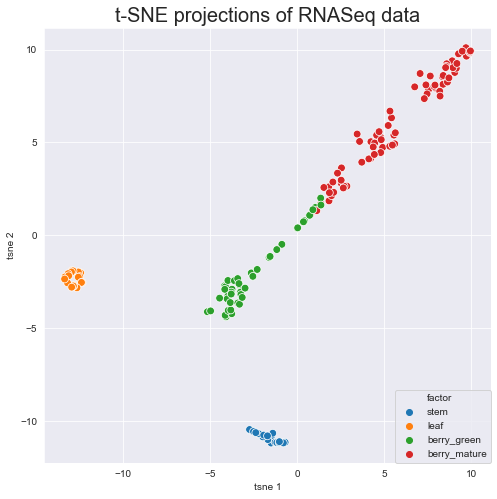

In [69]:
plot_tsne(data=df_tsne, name_fig='tsne_rnaseq_pca', title='t-SNE projections of RNASeq data')

### Analyse of features

In [15]:
pc1_loadings = loadings.sort_values(by='PC 1', ascending=False)[['PC 1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']
pc1_loadings = pc1_loadings.iloc[:30, :]
pc1_loadings

# plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
# plt.title('PCA loading scores (PC 1)', size=20)
# plt.xticks(rotation='vertical')
# plt.show()

,Attribute,CorrelationWithPC1
0,Vitvi10g00740,4.316237
1,Vitvi10g01839,4.257145
2,Vitvi07g02246,3.541443
3,Vitvi19g00298,3.413001
4,Vitvi06g01531,3.355258
5,Vitvi10g00882,3.251891
6,Vitvi10g02212,3.200520
7,Vitvi11g00089,3.199546
8,Vitvi10g01236,3.152678
9,Vitvi19g01793,3.151884


In [17]:
new_data = df_data_filtered.loc[:, pc1_loadings['Attribute']]
new_data.shape

(162, 30)

In [18]:
new_data_group = new_data.groupby(metadata['tissue']).mean()

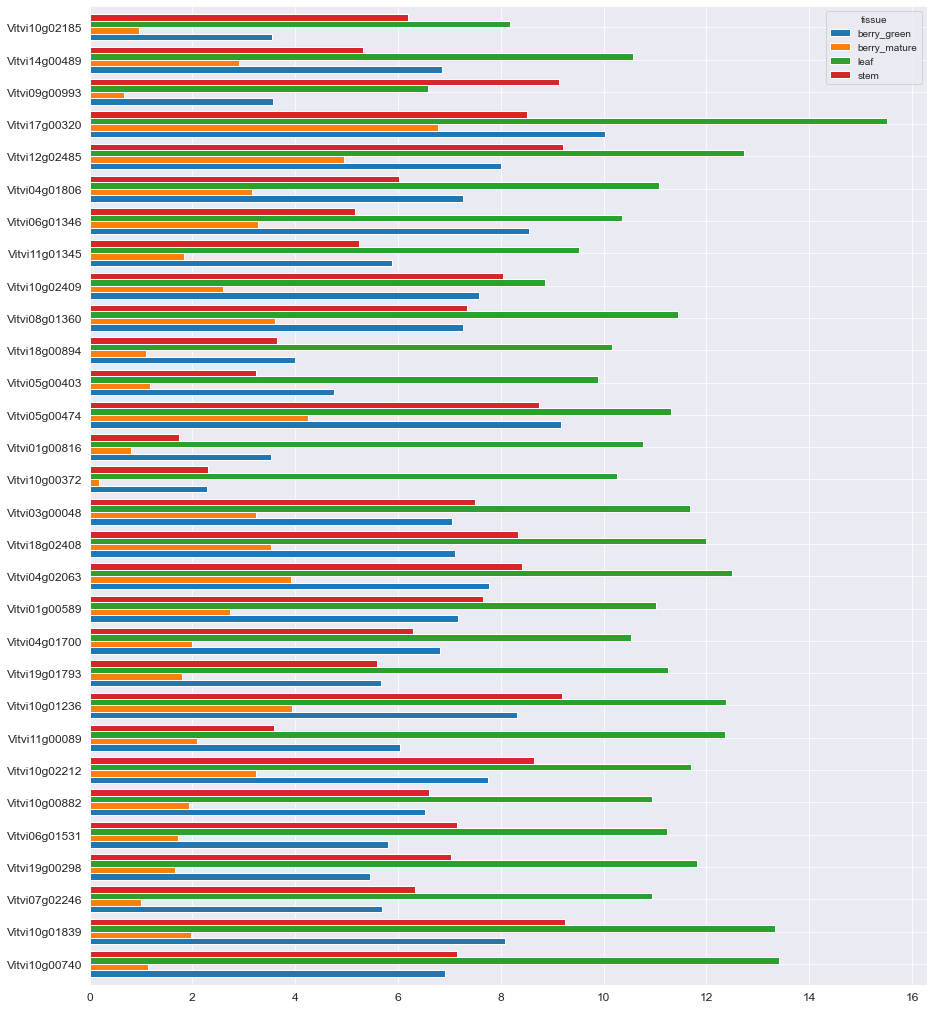

In [19]:
new_data_group.transpose().plot.barh(figsize=(15, 18),width=0.8, fontsize=12)

In [13]:
pc2_loadings = loadings.sort_values(by='PC 2', ascending=False)[['PC 2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']
pc2_loadings = pc2_loadings.iloc[:30, :]
pc2_loadings

,Attribute,CorrelationWithPC2
0,Vitvi04g01296,0.938328
1,Vitvi05g00867,0.933960
2,Vitvi09g00616,0.932545
3,Vitvi19g02007,0.927978
4,Vitvi18g00642,0.908712
5,Vitvi19g04230,0.899274
6,Vitvi05g01769,0.897117
7,Vitvi06g00210,0.892922
8,Vitvi15g00447,0.891754
9,Vitvi06g00337,0.890724


### LEAF

In [30]:
data_final = np.log2(df_data_scaled)

leaf = df_data_scaled[metadata['tissue'] == 'leaf']
notleaf = df_data_scaled[metadata['tissue'] != 'leaf']

pvalues = ttest_ind(leaf, notleaf, equal_var=False)[1]
df_pvalues = pd.DataFrame(pvalues, index=df_data_scaled.columns, columns=['pvalues'])
genes_dif = df_pvalues[df_pvalues['pvalues']<0.01]
genes_dif = genes_dif.sort_values(by=['pvalues'])
genes_dif[:30]

C:\Users\BiSBII\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,pvalues
XP_002283566.1,2.005044e-110
XP_002285664.1,4.252939e-104
XP_003634999.1,6.544796e-104
XP_002274150.2,6.544796e-104
XP_002283822.1,2.246467e-94
XP_002278284.1,2.221273e-93
XP_002271837.2,2.644071e-93
XP_002284906.1,4.900678e-93
XP_002285857.1,9.313152e-92
XP_002279359.1,1.176096e-90


### STEM

In [31]:
stem = df_data_scaled[metadata['tissue'] == 'stem']
notstem = df_data_scaled[metadata['tissue'] != 'stem']

pvalues = ttest_ind(stem, notstem, equal_var=False)[1]
df_pvalues = pd.DataFrame(pvalues, index=df_data_scaled.columns, columns=['pvalues'])
genes_dif = df_pvalues[df_pvalues['pvalues']<0.01]
genes_dif = genes_dif.sort_values(by=['pvalues'])
genes_dif[:30]

C:\Users\BiSBII\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,pvalues
XP_002270820.1,2.496221e-93
XP_010649824.1,4.837118e-72
XP_019075608.1,4.837118e-72
XP_010649823.1,4.837118e-72
XP_019075610.1,4.837118e-72
XP_019075609.1,4.837118e-72
XP_019075607.1,4.837118e-72
XP_002279124.3,1.550361e-67
XP_003632481.1,3.361944e-67
XP_019072230.1,4.422433e-67


### BERRY GREEN

In [32]:
berryg = df_data_scaled[metadata['tissue'] == 'berry_green']
notberryg = df_data_scaled[metadata['tissue'] != 'berry_green']

pvalues = ttest_ind(berryg, notberryg, equal_var=False)[1]
df_pvalues = pd.DataFrame(pvalues, index=df_data_scaled.columns, columns=['pvalues'])
genes_dif = df_pvalues[df_pvalues['pvalues']<0.01]
genes_dif = genes_dif.sort_values(by=['pvalues'])
genes_dif[:30]

C:\Users\BiSBII\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,pvalues
XP_002271795.1,7.383385e-63
XP_010650624.1,7.383385e-63
XP_002263459.1,2.311466e-59
XP_003631924.1,2.723893e-56
XP_002264606.1,2.723893e-56
XP_010649980.1,4.099481e-55
XP_003631999.1,4.099481e-55
XP_002283898.1,4.099481e-55
XP_002276744.2,5.156867e-55
XP_019081707.1,6.534549e-54


In [4]:
rnaseq_file = 'GREAT_TPM_GEO.csv'
metadata_file = 'RNAseq_metadata.xlsx'

In [7]:
data = pd.read_csv(os.path.join(DATAFOLDER, rnaseq_file), index_col=0)

In [8]:
metadata = pd.read_excel(os.path.join(DATAFOLDER, metadata_file), index_col=0)

In [9]:
data.shape

(5897, 161)

In [10]:
data = pd.DataFrame(np.log2(data.values + 1.1), index=data.index, columns=data.columns)

In [11]:
data_t = data.transpose()
data_t

,Vitvi00g00447,Vitvi00g00449,Vitvi00g00610,Vitvi00g00671,Vitvi00g00676,Vitvi00g00786,Vitvi00g00918,Vitvi00g01390,Vitvi00g01453,Vitvi00g01462,...,Vitvi19g04398,Vitvi19g04401,Vitvi19g04416,Vitvi19g04425,Vitvi19g04471,Vitvi19g04483,Vitvi19g04499,Vitvi19g04500,Vitvi19g04568,Vitvi19g04637
GSM2579822,0.137504,0.137504,0.137504,0.310340,0.918386,1.411426,0.137504,0.137504,0.137504,0.137504,...,0.137504,0.411426,0.137504,0.137504,1.130931,0.137504,0.137504,0.137504,2.419539,0.137504
GSM2579823,0.137504,0.137504,0.137504,0.137504,1.130931,2.204767,0.137504,0.137504,0.137504,0.137504,...,0.137504,0.137504,0.137504,0.137504,1.049631,0.137504,0.137504,0.137504,2.414136,0.137504
GSM2579824,0.137504,0.137504,0.137504,0.286881,0.632268,1.937344,0.137504,0.137504,0.137504,0.137504,...,0.137504,0.137504,0.286881,0.137504,1.195348,0.137504,0.137504,0.137504,2.895303,0.137504
GSM2579825,0.137504,0.137504,0.137504,0.137504,0.378512,1.550901,0.137504,0.137504,0.137504,0.137504,...,0.137504,0.137504,0.137504,0.137504,1.589763,0.137504,0.137504,0.137504,2.275007,0.137504
GSM2579826,0.422233,0.137504,0.137504,0.298658,0.137504,1.163499,0.137504,0.137504,0.137504,0.137504,...,0.137504,0.189034,0.137504,0.137504,1.599318,0.137504,0.137504,0.137504,2.198494,0.137504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2627818,0.263034,0.137504,0.137504,0.722466,1.176323,0.443607,0.137504,0.137504,0.367371,0.137504,...,0.137504,0.137504,0.137504,0.137504,0.400538,0.137504,0.137504,0.137504,2.833902,0.137504
GSM2627819,0.275007,0.137504,0.137504,0.594549,0.669027,0.495695,0.137504,0.137504,0.378512,0.137504,...,0.137504,0.137504,0.137504,0.137504,0.263034,0.137504,0.137504,0.137504,2.839960,0.137504
GSM2627820,0.137504,0.137504,0.137504,1.304511,0.739848,0.378512,0.137504,0.137504,0.310340,0.137504,...,0.137504,0.137504,0.137504,0.137504,0.344828,0.137504,0.137504,0.137504,2.807355,0.137504
GSM2627821,0.137504,0.137504,0.298658,0.799087,0.432959,0.422233,0.137504,0.137504,0.263034,0.137504,...,0.137504,0.163499,0.137504,0.137504,0.226509,0.137504,0.137504,0.137504,2.632268,0.137504


In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_t)
df_data_scaled = pd.DataFrame(data_scaled, columns=data_t.columns,
                              index=data_t.index)
df_data_scaled.shape

(161, 5897)

In [16]:
df_pca, explained_variance, df_names, loadings = run_pca(n_components=2, data=df_data_scaled)
df_pca

,PC 1,PC 2
GSM2579822,32.007412,-32.660535
GSM2579823,36.818058,-37.009779
GSM2579824,36.196414,-33.702332
GSM2579825,32.348746,-32.881399
GSM2579826,30.354467,-25.820500
...,...,...
GSM2627818,-43.271343,11.613766
GSM2627819,-41.650949,13.976064
GSM2627820,-42.331341,16.495690
GSM2627821,-43.813498,16.603459


In [14]:
df_pca['factor'] = metadata['tissue']

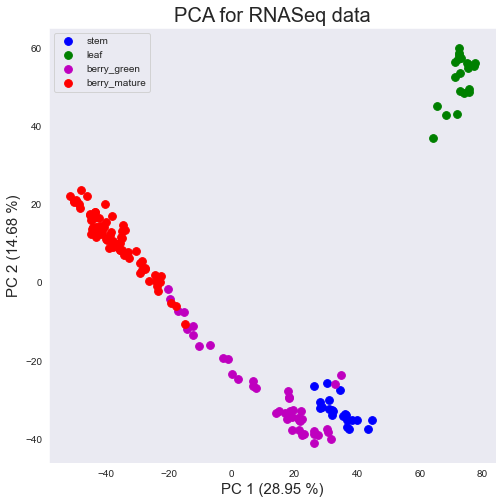

In [15]:
plot_pca(data=df_pca, explained_variance=explained_variance, c1='PC 1', c2='PC 2',
         title='PCA for RNASeq data', name_fig='pca_rnaseq_GREAT')

In [17]:
df_tsne = run_tsne(n_components=2, data=df_pca)
df_tsne

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,tsne 1,tsne 2
GSM2579822,0.986548,0.462382
GSM2579823,0.694975,1.651135
GSM2579824,1.316639,1.232686
GSM2579825,0.984598,0.552402
GSM2579826,1.772496,-0.330785
...,...,...
GSM2627818,-12.931238,-14.339041
GSM2627819,-12.403417,-14.975530
GSM2627820,-12.774542,-15.990870
GSM2627821,-13.263364,-16.075546


In [18]:
df_tsne['factor'] = metadata['tissue']

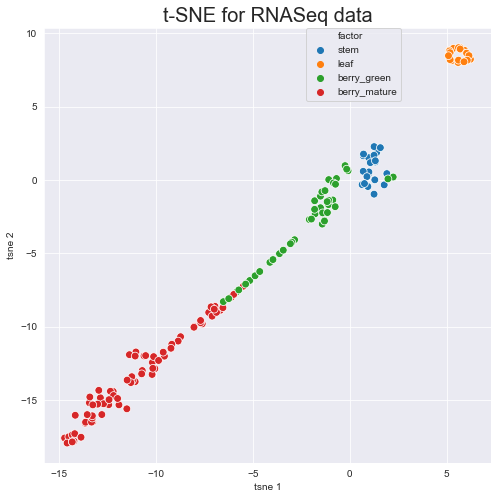

In [21]:
plot_tsne(data=df_tsne, name_fig='tsne_rnaseq_pca_GREAT', title='t-SNE for RNASeq data')

In [22]:
df_tsne = run_tsne(n_components=2, data=df_data_scaled)
df_tsne

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,tsne 1,tsne 2
GSM2579822,0.109262,6.110705
GSM2579823,2.508120,6.940009
GSM2579824,2.320061,7.049264
GSM2579825,2.181376,7.305870
GSM2579826,1.729063,7.947501
...,...,...
GSM2627818,-12.581613,4.203025
GSM2627819,-12.573679,3.935288
GSM2627820,-13.732786,4.089072
GSM2627821,-13.693835,3.882654


### BERRY MATURE

In [33]:
berrym = df_data_scaled[metadata['tissue'] == 'berry_mature']
notberrym = df_data_scaled[metadata['tissue'] != 'berry_mature']

pvalues = ttest_ind(berrym, notberrym, equal_var=False)[1]
df_pvalues = pd.DataFrame(pvalues, index=df_data_scaled.columns, columns=['pvalues'])
genes_dif = df_pvalues[df_pvalues['pvalues']<0.01]
genes_dif = genes_dif.sort_values(by=['pvalues'])
genes_dif[:30]

C:\Users\BiSBII\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,pvalues
XP_019078450.1,1.666859e-70
XP_019081125.1,4.412221e-69
XP_002263346.1,1.505370e-68
XP_010656998.1,2.276079e-65
XP_002276464.1,2.276079e-65
XP_010647788.1,2.302856e-65
XP_002284953.1,2.302856e-65
XP_019080899.1,8.005219e-65
XP_002274214.2,1.072896e-64
XP_002280923.1,2.618403e-64


# GREAT data

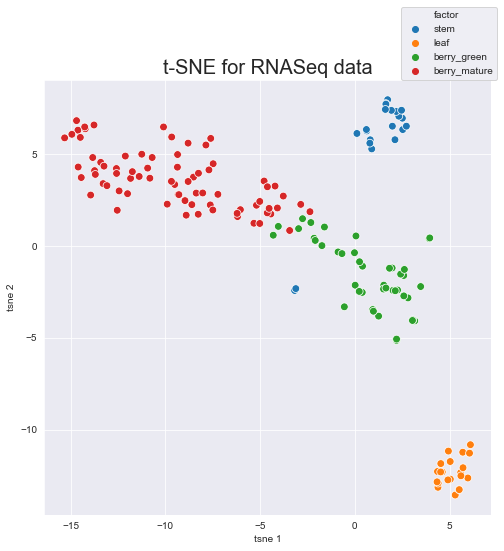

In [28]:
df_tsne['factor'] = metadata['tissue']
plot_tsne(data=df_tsne, name_fig='tsne_rnaseq_GREAT', title='t-SNE for RNASeq data')

# METABOLOMICS

In [3]:
DATAFOLDER = 'C:/Users/BiSBII/Documents/plantdb/omics_data/RNAseq'

In [4]:
metabolomics_file = 'metabolomics.xlsx'
metadata_file = 'metabolomics_metadata.csv'

In [8]:
data_mets = pd.read_excel(os.path.join(DATAFOLDER, metabolomics_file), index_col=0, header=1)
metadata_mets = pd.read_csv(os.path.join(DATAFOLDER, metadata_file), index_col=0)
data_mets = data_mets.loc[:, data_mets.columns != 'Method']
data_mets = data_mets.iloc[:, :120]
data_mets

,CS12_0_1_0,CS12_0_2_0,CS12_0_3_0,CS12_A_1_1,CS12_A_1_10,CS12_A_1_11,CS12_A_1_12,CS12_A_1_2,CS12_A_1_3,CS12_A_1_4,...,CS14_A_3_11,CS14_A_3_12,CS14_A_3_2,CS14_A_3_3,CS14_A_3_4,CS14_A_3_5,CS14_A_3_6,CS14_A_3_7,CS14_A_3_8,CS14_A_3_9
Metabolite Name,,,,,,,,,,,,,,,,,,,,,
xylose,3.865952,3.260054,4.067024,3.549598,2.364611,1.485255,1.611260,4.233244,3.225201,2.560322,...,3.707775,4.045576,3.831099,1.498660,1.619303,3.048257,2.353887,3.975871,3.605898,2.075067
xylonic acid,0.308311,0.243968,0.308311,0.249330,1.664879,0.828418,1.289544,0.117962,0.077748,0.418231,...,0.983914,0.946381,0.463807,0.343164,0.525469,0.774799,0.627346,0.780161,0.750670,0.683646
vanillic acid,0.158177,0.144772,0.048257,0.115282,0.112601,0.107239,0.115282,0.126005,0.142091,0.053619,...,0.399464,0.538874,0.571046,0.412869,0.353887,0.434316,0.313673,0.485255,0.474531,0.343164
valine,1.568365,2.469169,1.152815,0.640751,8.978552,10.991957,9.922252,1.638070,0.659517,0.903485,...,2.514745,3.801609,0.954424,1.021448,0.906166,1.501340,1.638070,2.865952,1.568365,1.187668
urea,0.541555,1.083110,2.024129,1.659517,1.694370,1.260054,1.809651,0.857909,0.412869,0.831099,...,1.064343,0.514745,1.260054,1.040214,1.265416,0.949062,0.761394,0.474531,1.091153,0.731903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spirotetramat,6.103717,10.381482,15.239863,0.412186,8.410129,4.136514,0.535074,1.573013,2.763038,6.117379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
splitomicin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
taxifolin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.132584,...,3.902741,4.150309,1.235485,2.759210,3.598585,4.797524,4.012968,8.499853,6.753905,5.903330


In [6]:
data_mets.describe()

,CS12_0_1_0,CS12_0_2_0,CS12_0_3_0,CS12_A_1_1,CS12_A_1_10,CS12_A_1_11,CS12_A_1_12,CS12_A_1_2,CS12_A_1_3,CS12_A_1_4,...,CS14_A_3_11,CS14_A_3_12,CS14_A_3_2,CS14_A_3_3,CS14_A_3_4,CS14_A_3_5,CS14_A_3_6,CS14_A_3_7,CS14_A_3_8,CS14_A_3_9
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,13.217193,13.505065,13.464210,12.703354,42.854187,53.428725,41.472097,16.595546,17.545952,31.493888,...,82.832424,91.602249,16.028437,16.928054,16.730548,54.854022,57.933453,72.322900,81.981163,65.299798
std,66.622843,60.210289,71.799433,62.865944,211.491858,269.356238,169.776750,100.772702,96.194547,191.112029,...,537.734478,596.248218,77.835495,79.134421,81.668573,294.675077,295.672213,430.941563,518.832462,334.913881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.104558,0.085791,0.077078,0.073727,0.356599,0.166220,0.203753,0.097185,0.069705,0.230563,...,0.580429,0.580670,0.468882,0.430965,0.373324,0.560322,0.380027,0.481903,0.551609,0.332440
50%,0.504021,0.455764,0.339142,0.415208,1.760054,1.297587,2.045870,0.668901,0.522788,1.130027,...,1.479893,1.607239,0.958445,0.926273,1.011613,1.601877,1.230563,1.465147,1.333638,1.036193
75%,3.563036,3.265042,3.131479,3.191689,8.310609,9.899938,12.659881,3.404826,3.182976,4.412760,...,5.399408,6.699062,2.808512,2.917035,3.331565,5.197854,6.387710,8.411435,5.437668,6.070929
max,713.048257,621.013405,833.847185,648.949062,2286.270777,2764.431635,1549.898123,1240.715818,1162.461126,2384.809651,...,7161.525469,7962.434316,742.075449,948.695550,1002.184987,3789.747989,3645.801609,5681.000000,6903.592493,4060.731903


In [33]:
data_mets.isna().any(axis=1).sum()

0

green     45
mature    75
Name: factor, dtype: int64


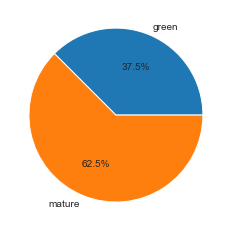

In [34]:
values = metadata_mets['factor'].value_counts()
values = values.sort_index()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
plt.savefig('pie_metabolomics.png')
plt.show()

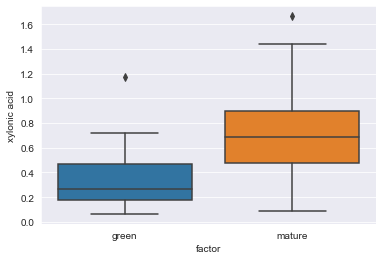

In [35]:
example = data_mets.iloc[1, :]
sb.boxplot(x = metadata['factor'], y = example)

In [9]:
data_mets_t = data_mets.transpose()
# data_t = data_t.astype(float)
data_mets_t

Metabolite Name,xylose,xylonic acid,vanillic acid,valine,urea,uracil,UDP-glucuronic acid,tyrosol,tyrosine,tryptophan,...,proline,quercetin-3-glucoside,quercetin-3-glucuronide,resveratrol,resveratrol dimer (pallidol or viniferin),spirotetramat,splitomicin,taxifolin,tributyl phosphate,tyrosine
CS12_0_1_0,3.865952,0.308311,0.158177,1.568365,0.541555,0.075067,0.635389,0.160858,1.193029,4.490617,...,108.618224,1.062913,21.228368,0.000955,0.000000,6.103717,0.0,0.000000,34.438299,0.000000
CS12_0_2_0,3.260054,0.243968,0.144772,2.469169,1.083110,0.104558,0.493298,0.067024,1.495979,4.965147,...,95.041575,0.866498,24.132731,0.000000,0.000000,10.381482,0.0,0.000000,152.884714,0.000000
CS12_0_3_0,4.067024,0.308311,0.048257,1.152815,2.024129,0.080429,0.823056,0.104558,1.474531,4.353887,...,92.855773,0.840128,16.748935,0.000000,0.000000,15.239863,0.0,0.000000,38.786396,0.421625
CS12_A_1_1,3.549598,0.249330,0.115282,0.640751,1.659517,0.045576,0.418231,0.000000,0.600536,2.530831,...,81.820920,0.938593,18.445534,0.000000,0.000000,0.412186,0.0,0.000000,190.192118,0.000000
CS12_A_1_10,2.364611,1.664879,0.112601,8.978552,1.694370,0.142091,2.962466,0.099196,1.766756,0.597855,...,206.592111,16.024570,10.791648,0.000000,0.000000,8.410129,0.0,0.000000,55.184038,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS14_A_3_5,3.048257,0.774799,0.434316,1.501340,0.949062,0.404826,1.563003,0.563003,1.088472,0.630027,...,873.653404,68.113764,73.892131,1.461244,0.395520,0.000000,0.0,4.797524,0.000000,0.000000
CS14_A_3_6,2.353887,0.627346,0.313673,1.638070,0.761394,0.378016,1.268097,0.380697,0.989276,0.710456,...,1289.081639,71.556734,63.642794,1.620395,0.380784,0.000000,0.0,4.012968,0.000000,0.000000
CS14_A_3_7,3.975871,0.780161,0.485255,2.865952,0.474531,0.474531,1.297587,0.474531,1.327078,1.144772,...,1529.427645,97.676982,80.368406,2.131447,0.428529,0.000000,0.0,8.499853,0.000000,0.000000
CS14_A_3_8,3.605898,0.750670,0.474531,1.568365,1.091153,0.439678,2.000000,0.485255,1.378016,0.648794,...,1627.832007,175.596817,110.513410,1.356322,0.446802,0.000000,0.0,6.753905,0.000000,0.000000


In [30]:
df_pca, explained_variance, names, loadings = run_pca(n_components=2, data=data_mets_t)
explained_variance

array([0.69971702, 0.16950311])

In [27]:
df_pca['factor'] = metadata_mets['factor']
df_pca['factor']

CS12_0_1_0      green
CS12_0_2_0      green
CS12_0_3_0      green
CS12_A_1_1      green
CS12_A_1_10    mature
                ...  
CS14_A_3_5     mature
CS14_A_3_6     mature
CS14_A_3_7     mature
CS14_A_3_8     mature
CS14_A_3_9     mature
Name: factor, Length: 120, dtype: object

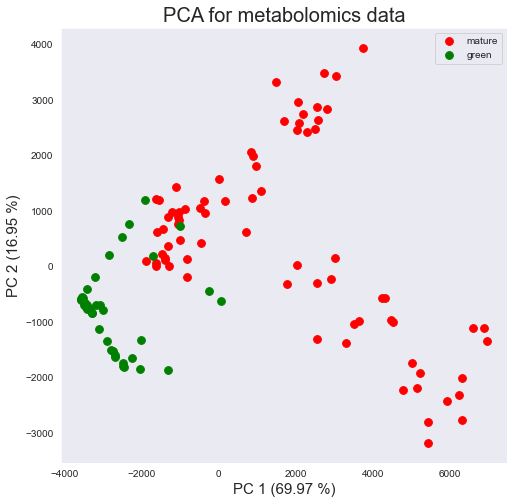

In [28]:
plot_pca(data=df_pca, explained_variance=explained_variance, c1='PC 1', c2='PC 2',
         title='PCA for metabolomics data', name_fig='pca_metabolomics')

In [14]:
pc1_loadings = loadings.sort_values(by='PC 1', ascending=False)[['PC 1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']
pc1_loadings = pc1_loadings.iloc[:30, :]
pc1_loadings

,Attribute,CorrelationWithPC1
0,tributyl phosphate,0.740906
1,shikimic acid,0.690341
2,benzyl tetradecyl dimethylammonium cation,0.683884
3,p-coumaric acid,0.683723
4,"didodecyl 3,3'-thiodipropionate oxide",0.669047
5,procyanidin trimer,0.655341
6,pelargonic acid,0.648943
7,oxoproline,0.640410
8,ribonic acid,0.616823
9,citric acid,0.616252


In [15]:
pc2_loadings = loadings.sort_values(by='PC 2', ascending=False)[['PC 2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']
pc2_loadings = pc2_loadings.iloc[:30, :]
pc2_loadings

,Attribute,CorrelationWithPC2
0,sucrose,0.855157
1,hexitol,0.771906
2,malvidin 3-(6''-acetylglucoside),0.710202
3,mucic acid,0.709738
4,glutamic acid,0.694656
5,malvidin-3-O-glucoside,0.681522
6,glucose,0.677197
7,"1,2-anhydro-myo-inositol NIST",0.670265
8,proline,0.669335
9,glucoheptulose,0.654344


In [32]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_mets_t)
df_data_scaled = pd.DataFrame(data_scaled, columns=data_mets_t.columns,
                              index=data_mets_t.index)
df_data_scaled.shape

(120, 212)

In [33]:
df_tsne = run_tsne(n_components=2, data=df_data_scaled)

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [34]:
df_tsne['factor'] = metadata_mets['factor']

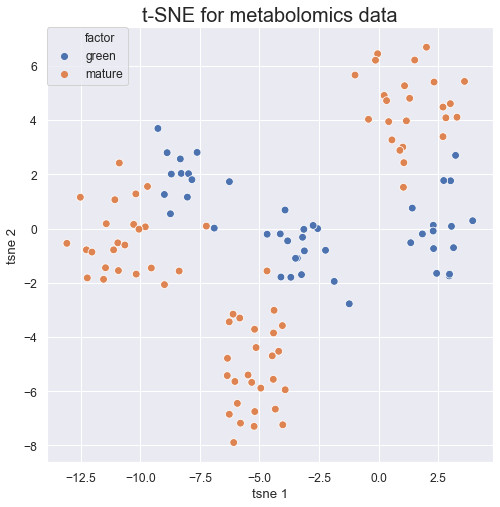

In [35]:
plot_tsne(data=df_tsne, name_fig='tsne_metabolomics_scaled', title='t-SNE for metabolomics data')

In [16]:
berryg = df_data_scaled[metadata['factor'] == 'green']
berrym = df_data_scaled[metadata['factor'] == 'mature']

pvalues = ttest_ind(berryg, berrym, equal_var=False)[1]
df_pvalues = pd.DataFrame(pvalues, index=df_data_scaled.columns, columns=['pvalues'])
genes_dif = df_pvalues[df_pvalues['pvalues']<0.01]
genes_dif = genes_dif.sort_values(by=['pvalues'])
genes_dif[:30]

C:\Users\BiSBII\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,pvalues
Metabolite Name,
glucose,7.956776e-33
sucrose,1.725063e-31
fructose,1.857321e-30
"1,2-anhydro-myo-inositol NIST",8.648518e-23
hexitol,6.236227e-21
malvidin-3-O-glucoside,8.077628e-21
malic acid,3.936516e-20
maltose,1.083004e-18
peonidin 3-(6''-acetylglucoside),1.258226e-18


# METABOLOMICS SELECT K BEST

In [11]:
import scipy
from sklearn.feature_selection import SelectPercentile, f_classif, SelectKBest
import matplotlib.pyplot as plt

In [12]:
selector = SelectKBest(f_classif, k=50)

In [13]:
data_array_mets = selector.fit_transform(data_mets_t, metadata_mets['factor'])

cols = selector.get_support(indices=True)

diff_mets = data_mets_t.iloc[:, cols].columns
print(diff_mets)

new_data_mets = pd.DataFrame(data_array_mets, index=data_mets_t.index, columns=data_mets_t.iloc[:, cols].columns)
new_data_mets


Index(['xylonic acid', 'UDP-glucuronic acid', 'tryptophan', 'threonic acid',
       'tartaric acid', 'sucrose', 'ribonic acid', 'raffinose', 'putrescine',
       'proline', 'phenylalanine', 'pentonic acid', 'mucic acid', 'maltose',
       'malic acid', 'lactitol', 'isocitric acid', 'hexitol', 'glutamic acid',
       'glucose', 'galactinol', 'fructose', 'ethanolamine', 'citric acid',
       'cellobiose', 'beta-alanine', 'alpha-ketoglutarate', '6-deoxyglucose',
       '3,6-anhydro-D-galactose', '1,2-anhydro-myo-inositol NIST', '1-kestose',
       'benzenemethanol', 'D-erythro-dihydrosphingosine',
       'D-glucose 6-phosphate', 'delphinidin 3-(6''-acetylglucoside)',
       'isorhamnetin', 'kaempferol', 'laricitrin', 'laricitrin-3-glucoside',
       'malvidin', 'malvidin 3-(6''-acetylglucoside)',
       'malvidin-3-O-glucoside', 'myricetin', 'myricetin-3-glucoside',
       'peonidin', 'peonidin 3-(6''-acetylglucoside)', 'peonidin-3-glucoside',
       'petunidin', 'petunidin 3-(6''-acetylg

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [150 160 172 200 208] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Metabolite Name,xylonic acid,UDP-glucuronic acid,tryptophan,threonic acid,tartaric acid,sucrose,ribonic acid,raffinose,putrescine,proline,...,malvidin 3-(6''-acetylglucoside),malvidin-3-O-glucoside,myricetin,myricetin-3-glucoside,peonidin,peonidin 3-(6''-acetylglucoside),peonidin-3-glucoside,petunidin,petunidin 3-(6''-acetylglucoside),petunidin-3-glucoside
CS12_0_1_0,0.308311,0.635389,4.490617,19.238606,713.048257,12.297587,5.919571,1.171582,1.447721,0.412869,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CS12_0_2_0,0.243968,0.493298,4.965147,16.978552,621.013405,12.517426,5.426273,1.410188,1.445040,0.485255,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CS12_0_3_0,0.308311,0.823056,4.353887,21.139410,833.847185,11.131367,4.957105,1.394102,2.021448,1.611260,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CS12_A_1_1,0.249330,0.418231,2.530831,16.168901,587.099196,1.300268,5.729223,1.600536,0.839142,0.817694,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CS12_A_1_10,1.664879,2.962466,0.597855,2.351206,228.758713,558.879357,2.120643,0.581769,4.798928,331.142091,...,629.1425,568.517702,9.839577,8.277435,6.426436,37.419495,44.692412,1.752461,11.671368,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS14_A_3_5,0.774799,1.563003,0.630027,3.865952,199.335121,101.758713,1.418231,0.474531,1.396783,1.436997,...,0.0000,843.798998,17.244327,56.013557,19.416446,277.038020,380.271146,9.990569,140.516357,204.674329
CS14_A_3_6,0.627346,1.268097,0.710456,1.418231,104.924933,106.900804,0.699732,0.359249,1.193029,23.109920,...,0.0000,1069.641615,36.427350,117.921603,13.856174,242.268199,281.290893,12.131447,160.308282,222.695550
CS14_A_3_7,0.780161,1.297587,1.144772,1.260054,94.233244,190.983914,0.638070,0.479893,1.849866,30.364611,...,0.0000,1073.258473,38.429119,120.136163,9.809608,183.113469,203.570292,8.381963,101.621574,157.194223
CS14_A_3_8,0.750670,2.000000,0.648794,1.201072,97.361930,249.774799,0.841823,0.605898,2.479893,44.211796,...,0.0000,1366.404951,51.592101,163.606838,14.828176,258.370174,299.332744,12.462128,161.278515,242.496316


In [43]:
metabolite_green = new_data_mets[metadata_mets['factor'] == 'green']
metabolite_green['peonidin 3-(6\'\'-acetylglucoside)'].mean()

-0.8187107349182297

In [44]:
metabolite_mature = new_data_mets[metadata_mets['factor'] == 'mature']
metabolite_mature['peonidin 3-(6\'\'-acetylglucoside)'].mean()

0.49122644095093754

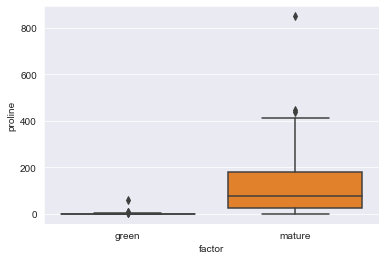

In [21]:
example = new_data_mets.loc[:, 'proline']
sb.boxplot(x = metadata_mets['factor'], y = example)

In [14]:
data_folder = 'C:/Users/BiSBII/Documents/plantdb/omics_data/RNAseq/'

In [19]:
for met in diff_mets:
    example = data_mets_t.loc[:, met]
    fig, ax = plt.subplots()
    sb.boxplot(x = metadata_mets['factor'], y = example)
    plt.title(met)
    fig_path = os.path.join(data_folder, 'diff_mets', met + '.png')
    plt.savefig(fig_path)
    plt.clf()

<ipython-input-19-1729330cba6a>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-19-1729330cba6a>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-19-1729330cba6a>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipytho

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [28]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data_mets)
df_data_scaled = pd.DataFrame(data_scaled, columns=new_data_mets.columns,
                              index=new_data_mets.index)
df_data_scaled

Metabolite Name,xylonic acid,UDP-glucuronic acid,tryptophan,threonic acid,tartaric acid,sucrose,ribonic acid,raffinose,putrescine,proline,...,malvidin 3-(6''-acetylglucoside),malvidin-3-O-glucoside,myricetin,myricetin-3-glucoside,peonidin,peonidin 3-(6''-acetylglucoside),peonidin-3-glucoside,petunidin,petunidin 3-(6''-acetylglucoside),petunidin-3-glucoside
CS12_0_1_0,-0.794473,-1.178421,2.405562,2.424137,2.277137,-1.127943,3.367015,0.047046,-0.379775,-0.625173,...,-0.671481,-0.923987,-0.840894,-0.726973,-0.851572,-0.927258,-0.897943,-0.817055,-0.725802,-0.694247
CS12_0_2_0,-0.999003,-1.453569,2.765454,2.033241,1.816978,-1.126421,2.996853,0.221145,-0.381318,-0.624624,...,-0.671481,-0.923987,-0.840894,-0.726973,-0.851572,-0.927258,-0.897943,-0.817055,-0.725802,-0.694247
CS12_0_3_0,-0.794473,-0.815018,2.301865,2.752897,2.881112,-1.136017,2.644797,0.209408,-0.049513,-0.616095,...,-0.671481,-0.923987,-0.840894,-0.726973,-0.851572,-0.927258,-0.897943,-0.817055,-0.725802,-0.694247
CS12_A_1_1,-0.981959,-1.598931,0.919231,1.893205,1.647413,-1.204081,3.224181,0.360033,-0.730099,-0.622106,...,-0.671481,-0.923987,-0.840894,-0.726973,-0.851572,-0.927258,-0.897943,-0.817055,-0.725802,-0.694247
CS12_A_1_10,3.517709,3.327778,-0.546767,-0.496684,-0.144231,2.656229,0.516366,-0.383312,1.549322,1.880115,...,-0.168885,-0.458206,-0.530606,-0.653664,-0.086152,-0.714850,-0.732092,-0.517755,-0.656764,-0.694247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS14_A_3_5,0.688373,0.617829,-0.522368,-0.234696,-0.291344,-0.508573,-0.010713,-0.461558,-0.409097,-0.617415,...,-0.671481,-0.232671,-0.297100,-0.230888,1.461021,0.645327,0.513224,0.889221,0.105375,0.009902
CS14_A_3_6,0.219657,0.046767,-0.461369,-0.658050,-0.763379,-0.472972,-0.549861,-0.545674,-0.526386,-0.453241,...,-0.671481,-0.047641,0.307829,0.317402,0.798766,0.447959,0.145913,1.254859,0.222448,0.071901
CS14_A_3_7,0.705417,0.103873,-0.131977,-0.685408,-0.816836,0.109164,-0.596132,-0.457646,-0.148283,-0.398287,...,-0.671481,-0.044678,0.370954,0.337016,0.316800,0.112171,-0.142504,0.614489,-0.124694,-0.153446
CS14_A_3_8,0.611674,1.464039,-0.508135,-0.695610,-0.801193,0.516193,-0.443239,-0.365706,0.214387,-0.293394,...,-0.671481,0.195494,0.786043,0.722015,0.914536,0.539361,0.212866,1.311335,0.228187,0.140022


In [30]:
new_data_group = df_data_scaled.groupby(metadata_mets['factor']).mean()
new_data_group

Metabolite Name,xylonic acid,UDP-glucuronic acid,tryptophan,threonic acid,tartaric acid,sucrose,ribonic acid,raffinose,putrescine,proline,...,malvidin 3-(6''-acetylglucoside),malvidin-3-O-glucoside,myricetin,myricetin-3-glucoside,peonidin,peonidin 3-(6''-acetylglucoside),peonidin-3-glucoside,petunidin,petunidin 3-(6''-acetylglucoside),petunidin-3-glucoside
factor,,,,,,,,,,,,,,,,,,,,,
green,-0.727053,-0.757797,0.757879,0.984536,1.00920,-1.019458,0.612527,0.851597,-0.626425,-0.606918,...,-0.652943,-0.873443,-0.816462,-0.704763,-0.697065,-0.818711,-0.743371,-0.712433,-0.689474,-0.653227
mature,0.436232,0.454678,-0.454727,-0.590722,-0.60552,0.611675,-0.367516,-0.510958,0.375855,0.364151,...,0.391766,0.524066,0.489877,0.422858,0.418239,0.491226,0.446023,0.427460,0.413684,0.391936


[Text(28.109374999999986, 0.5, 'metabolites'), Text(0.5, 109.5, 'tissues')]

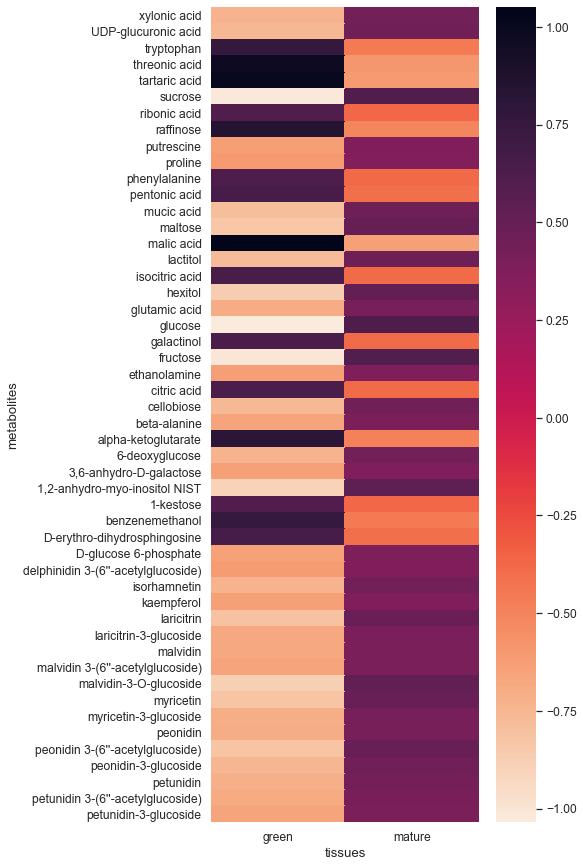

In [31]:
plt.figure(figsize = (6, 15))
sb.set(font_scale=1.1)
s = sb.heatmap(new_data_group.transpose(), cmap='rocket_r')
s.set(xlabel='tissues', ylabel='metabolites')

<Figure size 720x576 with 0 Axes>

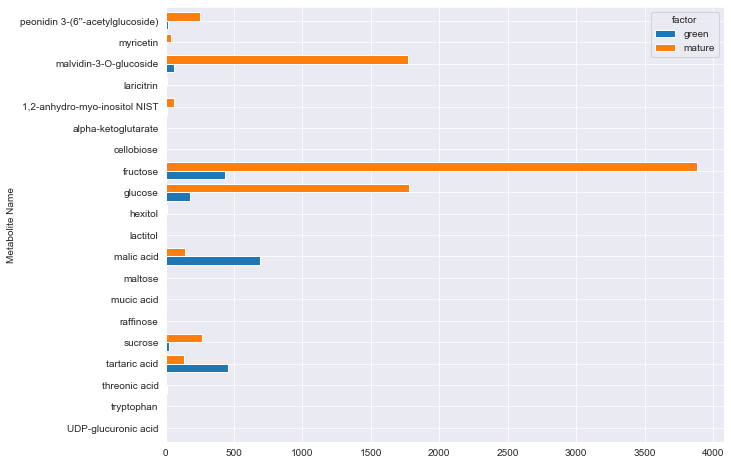

In [66]:
plt.figure(figsize=(10,8))
new_data_group.transpose().plot.barh(figsize=(10, 8),width=0.8)

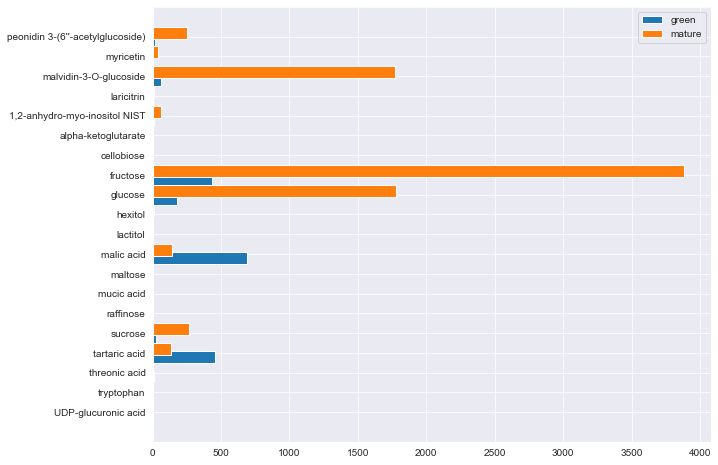

In [56]:
x = np.arange(20)
y1 = new_data_group.loc['green', :]
y2 =  new_data_group.loc['mature', :]
width = 0.6
  
plt.figure(figsize=(10,8))
# plot data in grouped manner of bar type
plt.barh(x-0.2, y1, width)
plt.barh(x+0.2, y2, width)

plt.yticks(x, new_data_group.columns)
plt.legend(new_data_group.index)
